# Week 6 assignment

In [29]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/wei/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['conjugate', 'exp', 'Polygon', 'nan', 'test', 'prod', 'lcm', 'Line2D', 'invert', 'add', 'vectorize', 'sin', 'source', 'det', 'plotting', 'binomial', 'interactive', 'cbrt', 'Number', 're', 'gcd', 'transpose', 'deprecated', 'gamma', 'trace', 'fft', 'sinh', 'diff', 'flatten', 'cosh', 'sinc', 'pi', 'poly', 'var', 'log', 'trunc', 'sign', 'plot', 'array', 'beta', 'take', 'floor', 'Circle', 'eye', 'erf', 'zeros', 'mod', 'seterr', 'f', 'ones', 'reshape', 'tanh', 'diag', 'product', 'tan', 'partition', 'solve', 'sqrt', 'multinomial', 'roots', 'cos', 'ifft', 'power']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [30]:
from sympy import *
init_printing(use_unicode = True, fontsize = 16)
pi2 = pi * 2

In [31]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.sound import *
from waves.tools.dsp import *

In [32]:
from scipy import signal

# 1.
If the input signal is \delta[n]-\delta[n+1]δ[n]−δ[n+1], then the z-transform of the output would be (-3z+1/2+5/2z^{-1})/(1+2z^{-1})(−3z+1/2+5/2z 
−1
 )/(1+2z 
−1
 ).

y[n] + 2y[n-1] = 3x[n] + 2.5x[n-1]  
y[n] + 2y[n] z^-1 = 3x[n] + 2.5x[n] z^-1
Y(z)/X(z) = (3+2.5z^-1) / (1 + 2z^-1)

In [33]:
b = [3, 2.5]
a = [1, 2]

z, p, k = signal.tf2zpk(b, a) 
z, p, k

(array([-0.83333333]), array([-2.]), 3.0)

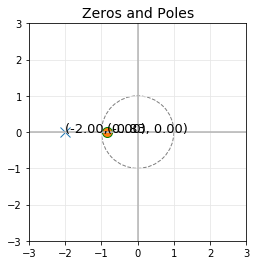

In [34]:
plt.figure(figsize = (4, 4))
filtering.plot_zplane(z, p, show_coordinates=True)

No handles with labels found to put in legend.


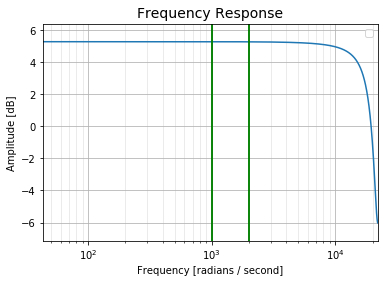

In [35]:
w, h = signal.freqz(b, a)
filtering.plot_freq_response(w/np.pi*22050, h, y_as_dB=True, wc = [1000, 2000])

# 2. 
$ \frac{1}{rU} < |z| < \frac{1}{rL} $

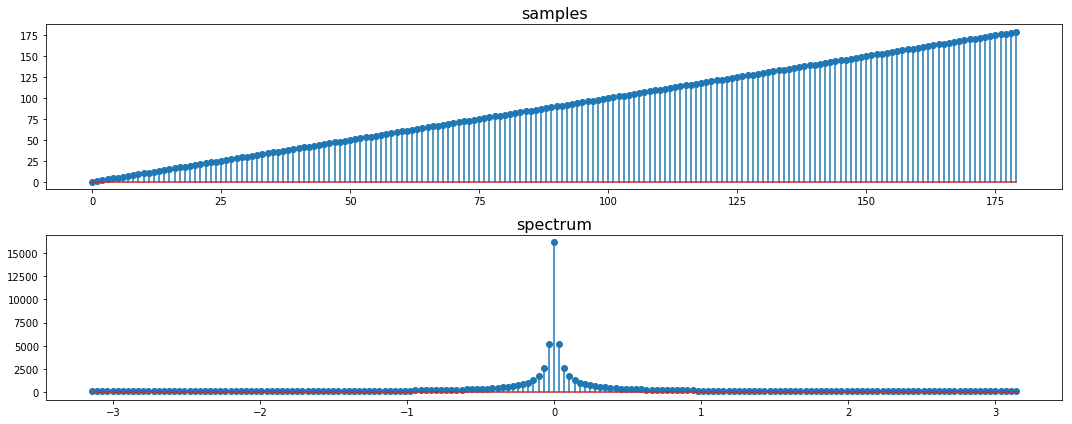

In [36]:
n = np.arange(N_SAMPLES)
x = n
X = fourier.dtft(x)

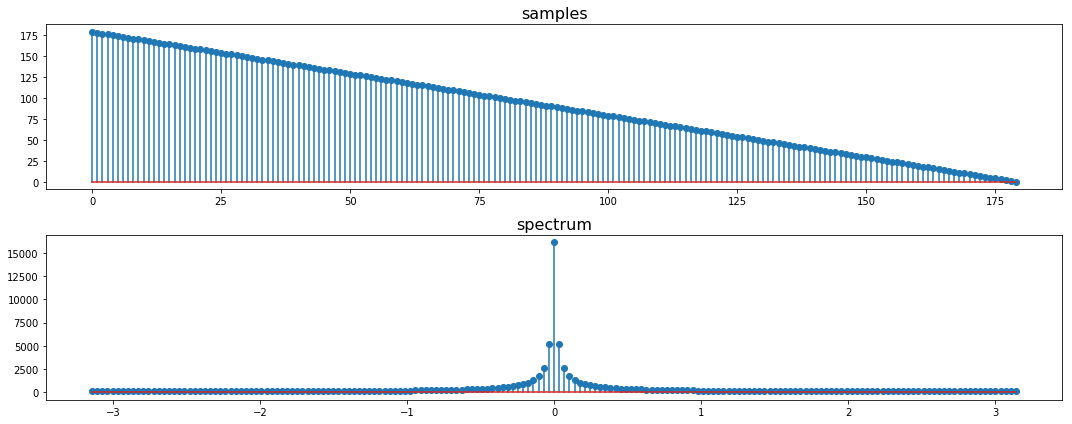

In [37]:
x1 = np.flip(x)
X1 = fourier.dtft(x1)

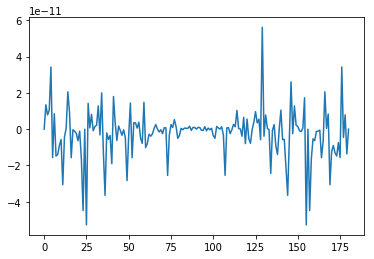

In [38]:
plt.plot(abs(X) - abs(X1))

# 3.
It contains R_g \cap R_hR 
g
​	 ∩R 
h
​	 .

# 4. 
H(z) = 4 when w = pi

y[n] - 1/2y[n-1] = 2x[n] - 5x[n-1] - x[n-2]  
y[n] - 1/2 * z^-1 * y[n] = 2 * x[n] -5 * x[n] * z^-1 - x[n] * z^-2  
Y(z) (1 - 0.5 z^-1) = X(z) (2 - 5z^-1 - z^-2)  
H(z) = Y(z)/X(z) =  (2 - 5z^-1 - z^-2) / (1 - 0.5 z^-1) 

In [39]:
b = (2, -5, -1)
a = (1, -0.5)

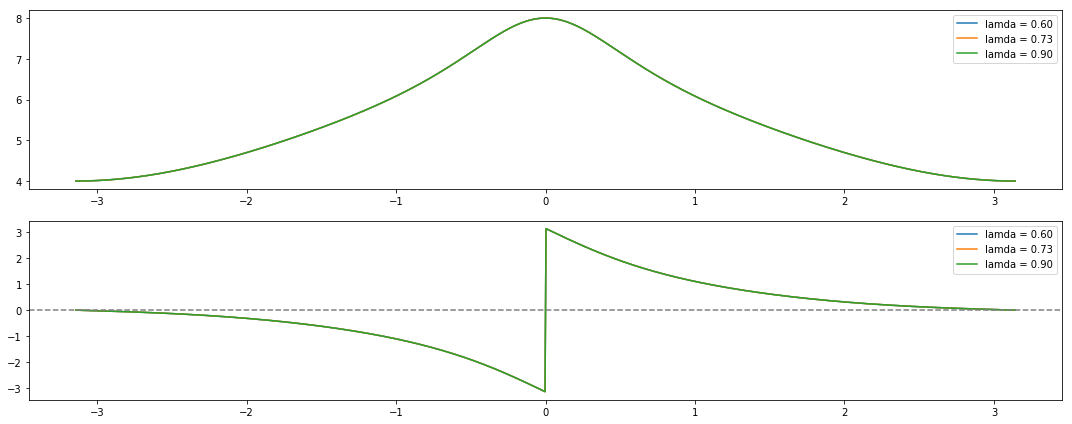

In [40]:
fig, axs = plt.subplots(2, 1, figsize = TWO_ROWS_FIGSIZE)

lamdas = 10**np.linspace(np.log10(0.6), np.log10(0.9), 3)
w = np.linspace(-1, 1, 1000) * np.pi
z = np.exp(1j*w)

def get_H(l = 0.97, w0 = np.pi/3, G0 = 1/6): 
    H =  (2-5*z**-1-z**-2)/(1-0.5*z**-1)
    return H


w0 = np.pi

for l in lamdas:     
    H = get_H(l = l, w0 = w0)
    axs[0].plot(w, np.abs(H) , label = 'lamda = {:0.2f}'.format(l)) 
    axs[1].plot(w, np.angle(H) , label = 'lamda = {:0.2f}'.format(l))

axs[1].axhline(0, color = 'grey', linestyle = '--')    
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()

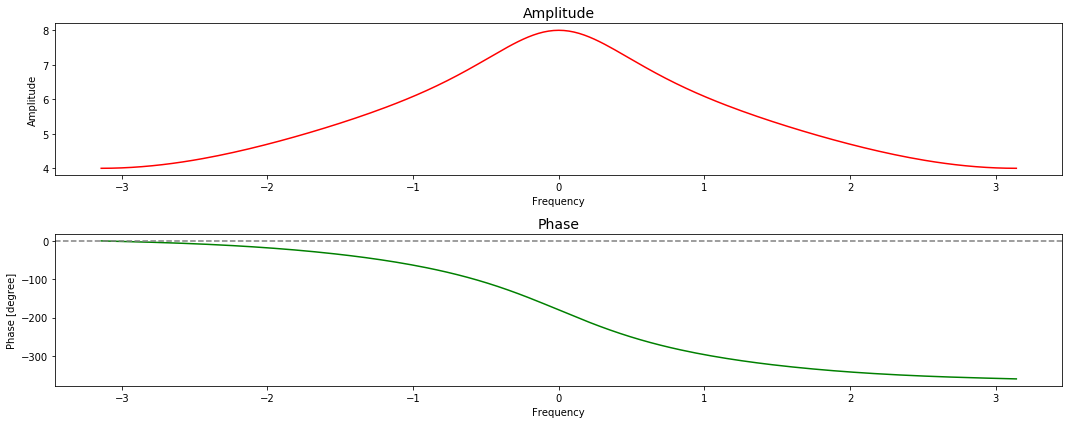

In [41]:
f, h = filtering.get_H_from_polynomials([b], [a], plot = True)

(array([ 2.68614066, -0.18614066]), array([0.5]), 2.0)

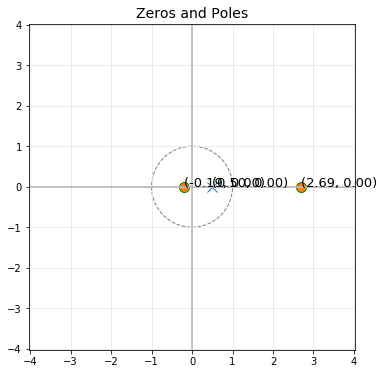

In [42]:
plt.figure(figsize = (6, 6))

z, p, k = signal.tf2zpk(b, a)
filtering.plot_zplane(z, p, show_coordinates = True)
z, p, k

No handles with labels found to put in legend.
No handles with labels found to put in legend.


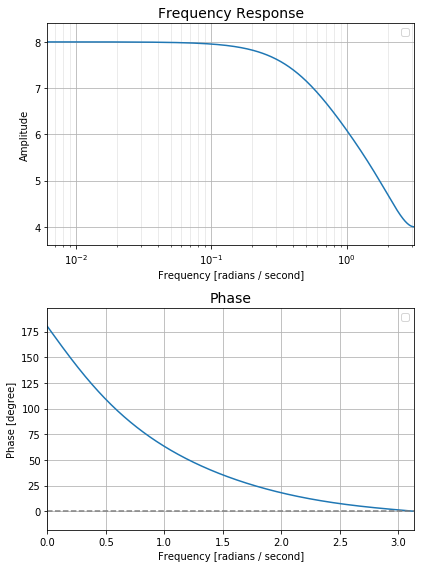

In [43]:
w, h = signal.freqz(b, a)
_ = filtering.plot_freq_phase_response(w, h, y_as_dB = False)

# 5. 
y[4] = 2   
The filter is mathematically unstable. Even in practice, you can see the output diverging |y[50]|>10^{13}∣y[50]∣>10 
13



y[n] + 2y[n-1] = x[n+1] - 1/2x[n]  
Y(z)(1 + 2z^-1) = X(z) (1z - 0.5)  
H(z) = Y(z)/X(z) = (1z - 0.5) / (1 + 2z^-1) 
H(z) = (z - 0.5) / (1 + 2z^-1) = (1 - 0.5z^-1) / (0 + z^-1 + 2z^-2)

In [44]:
b = (1, -0.5)
a = (0, 1, 2)

(array([0.5]), array([-2.]), 1.0)

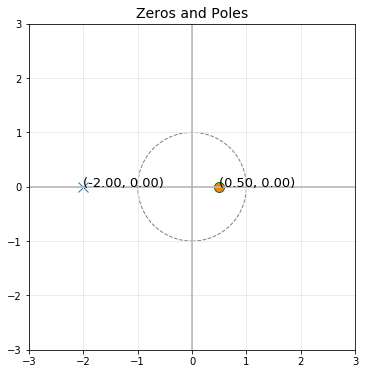

In [45]:
plt.figure(figsize = (6, 6))

z, p, k = signal.tf2zpk(b, a)
filtering.plot_zplane(z, p, show_coordinates = True)
z, p, k

No handles with labels found to put in legend.


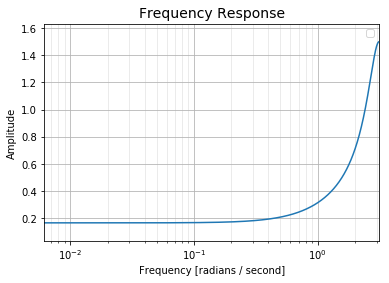

In [46]:
w, h = signal.freqz(b, a)
filtering.plot_freq_response(w, h, y_as_dB = False)

In [47]:
n = np.arange(-100, 100)
x = dsp.delta(n) +0.5*dsp.delta(n-1) 
x = x[-100:]
y = np.zeros(100)
x[:5]

array([1. , 0.5, 0. , 0. , 0. ])

/home/wei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


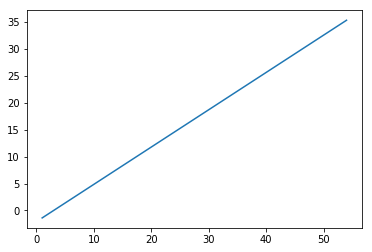

In [48]:
y[0] = x[1] - 0.5* x[0] 

for i in range(1,99):
    y[i] = -2*y[i-1] + x[i+1] - 0.5*x[i]

plt.plot(np.log(abs(y))[:55]);

# 6. 

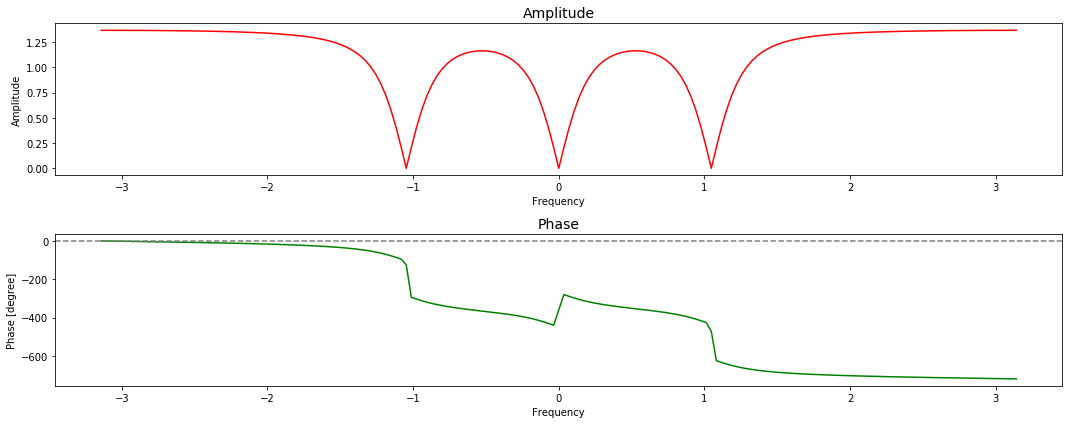

In [49]:
zeros = np.array([np.exp(1j*np.pi/3), np.exp(1j*0), np.exp(-1j*np.pi/3),]) * 1
poles = zeros * 0.8

freqs, H = filtering.get_H_from_zeros_poles(zeros, poles)
_ = filtering.plot_freq_phase_response_pi2(freqs, H)

# 7. 
It has one pole at z_1=3/2 


yn = xn +z_1 * (1/4*xn + 5/4*yn+3/8*yn*z_1))  
yn = xn + 1/4*xn*z_1 + 5/4*yn*z_1 + 3/8*yn*z_1*z_1  
yn - (5/4*yn*z_1 + 3/8*yn*z_1*z_1 ) =  xn + 1/4*xn*z_1  
Yz(1 - 5/4*z**-1 - 3/8*z**-2) = Xz(1 + 1/4*z**-1)  
Hz = Yz/Xz = (1 + 1/4*z**-1) / (1 - 5/4*z**-1 - 3/8*z**-2)  

b = [1, 1/4]  
a = [1, -5/4, -3/8]  

In [50]:
b = [1, 1/4]  
a = [1, -5/4, -3/8] 

(array([-0.25]), array([ 1.5 , -0.25]), 1.0)

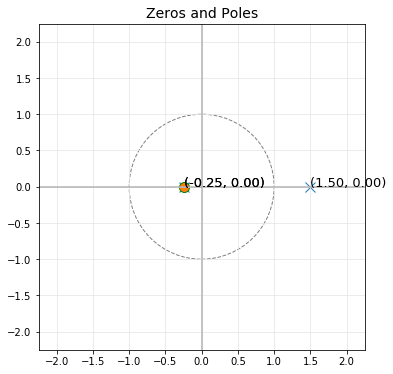

In [51]:
plt.figure(figsize = (6, 6))

z, p, k = signal.tf2zpk(b, a)
filtering.plot_zplane(z, p, show_coordinates = True);
z, p, k

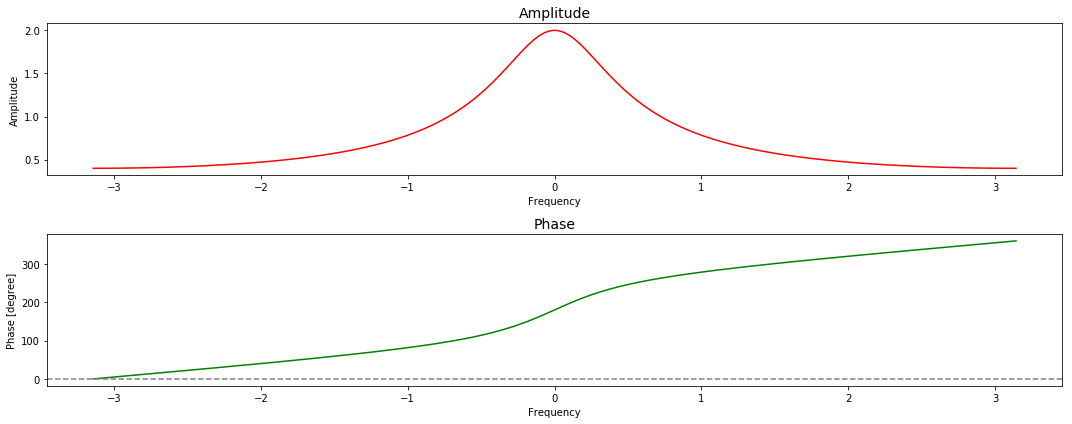

In [52]:
w, h = signal.freqz(b, a, dsp.get_freq_bins())
_ = filtering.plot_freq_phase_response_pi2(w, h)

# 8. 
1

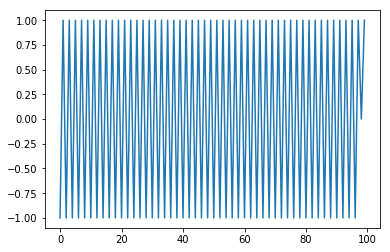

In [53]:
delay = 1

L = 100

f = 0;
g = 0;

x = np.zeros(100)
x[0] = 1
y = np.zeros(100)

for n in range(0, L-1):
    g = -f;
    y[n-delay] = x[n] + f;
    f = -x[n] + 0.5 * y[n] + g;
    
# plt.plot(x)
plt.plot(y);

# 9.
Hum removral

yn = xn + xn*z**-2 -0.95**2*xn*z**-2  
yn = xn(1 + z**-2 -0.95**2*z**-2)
Hz = (1 + z**-2 -0.95**2*z**-2)

b = [1, 0, 1 -0.95**2]  
a = [1]  


In [54]:
b = [1, 0, 1 -0.95**2]  
a = [1]  

(array([-0.+0.3122499j,  0.-0.3122499j]), array([], dtype=float64), 1.0)

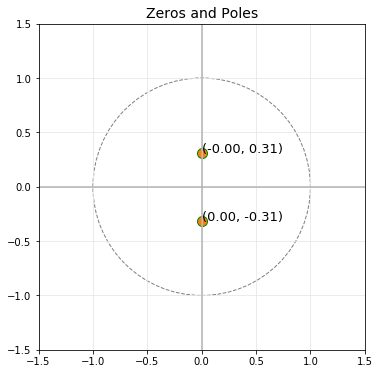

In [55]:
plt.figure(figsize = (6, 6))

z, p, k = signal.tf2zpk(b, a)
filtering.plot_zplane(z, p, show_coordinates = True);
z, p, k

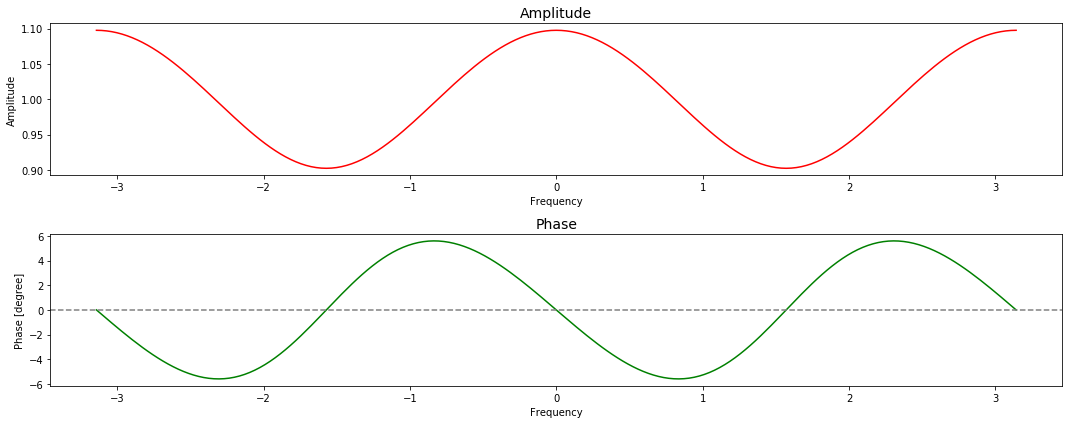

In [56]:
w, h = signal.freqz(b, a, dsp.get_freq_bins())
_ = filtering.plot_freq_phase_response_pi2(w, h)